# Pruebas Adaboost + DecisionTree

El set de training usado se genera desde `lucho/generar_set_test`

Cambios respecto a submit-45:
- Criterio para el split cambiado de entropy a gini
- min_samples_split aumentado de 1000 a 2200
- Se eliminaron algunos registros que se encontraron duplicados en el set de training.

In [2]:
import pandas as pd
import numpy as np

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score

%matplotlib inline

In [3]:
RANDOM_SEED = 12

In [4]:
entrenamiento = pd.read_csv('/home/luciano/orga-datos/training-set-final.csv').drop_duplicates()

In [5]:
no_postulaciones = entrenamiento[entrenamiento['sepostulo'] == 0].sample(500000, random_state=RANDOM_SEED)
postulaciones    = entrenamiento[entrenamiento['sepostulo'] == 1]

entrenamiento = pd.concat([postulaciones, no_postulaciones]).sample(frac=1)

In [6]:
kaggle_set = pd.read_csv('/home/luciano/orga-datos/test_final_100k-preprocesado.csv')

In [7]:
TEST_SIZE_PERCENT = 0.1

In [8]:
X = entrenamiento.drop(axis=1, labels=['idaviso', 'idpostulante', 'sepostulo'])
y = entrenamiento['sepostulo']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE_PERCENT, random_state=RANDOM_SEED)

In [9]:
X_kaggle = kaggle_set.drop(axis=1, labels=['id', 'idaviso', 'idpostulante'])

In [10]:
clasificador = AdaBoostClassifier(
    base_estimator = DecisionTreeClassifier(
        min_samples_split=2200,
        criterion = 'gini',
        random_state=RANDOM_SEED
    ),
    n_estimators=50,
    random_state=RANDOM_SEED
)

In [11]:
clasificador.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2200,
            min_weight_fraction_leaf=0.0, presort=False, random_state=12,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=12)

In [12]:
y_test_predictd = clasificador.predict_proba(X_test)[:, 1]

In [13]:
roc_auc_score(y_test, y_test_predictd)

0.9894563268187528

In [14]:
clasificador.score(X_test, y_test)

0.96088

In [15]:
y_kaggle = clasificador.predict_proba(X_kaggle)[:, 1]

In [16]:
kaggle_out = kaggle_set[['id']].copy()
kaggle_out['sepostulo'] = y_kaggle

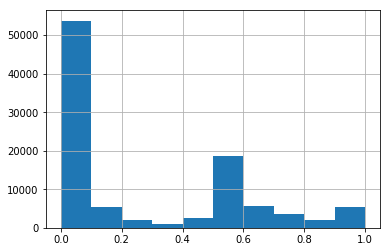

In [17]:
kaggle_out['sepostulo'].hist()

In [18]:
kaggle_out.to_csv('/home/luciano/orga-datos/tmp/submits/submit-49.csv', index=False)

In [19]:
kaggle_38 = pd.read_csv('/home/luciano/orga-datos/tmp/submits/submit-38.csv')

In [20]:
print('ROCAUC 38 vs 41:', roc_auc_score(np.round(kaggle_38['sepostulo']), kaggle_out['sepostulo']))

ROCAUC 38 vs 41: 0.9917885219609397


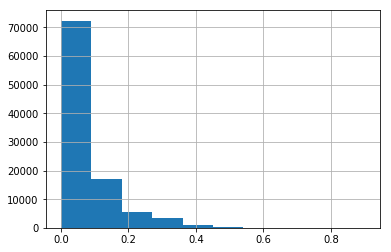

In [21]:
np.abs(kaggle_38['sepostulo'] - kaggle_out['sepostulo']).hist()

In [ ]:
# kaggle score: 0.85